<a href="https://colab.research.google.com/github/saks0106/LP_DeepLearning/blob/main/002.Tfidf_RecSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vector Similarity - using Euclidean Distance, Cosine Similairty/Distance
Vectors of different sizes, Cosine Distance is more useful than euclidean distance
When ranking is the purpose like RecSys, both can be used


tfidf(t,d) = tf(t,d)*idf(t)     , here t is term that we are counting, d is the document(row) where we are finding this term, idf t is only a particular term
Idf is measured by summation over all documents. CountVectorizer returns tfidf matrix.
idf is  --> log (inv((total no of documents)/term  t in all documents)) , inverse,max, log+1, log(1+d/d(t)),log-odds are all variation of idf
tfidf provides norm option like l2/l1 in sklearn unlike CountVectorizer

In [1]:
# https://www.kaggle.com/tmdb/tmdb-movie-metadata
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv

import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

df = pd.read_csv('tmdb_5000_movies.csv')
df.head()

--2023-10-05 15:28:47--  https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/csv]
Saving to: ‘tmdb_5000_movies.csv’

tmdb_5000_movies.cs 100%[===================>]   5.43M  4.78MB/s    in 1.1s    

2023-10-05 15:28:48 (4.78 MB/s) - ‘tmdb_5000_movies.csv’ saved [5698602/5698602]



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [2]:
columns_drop = ['budget','homepage','id','original_language','production_countries','revenue','runtime','spoken_languages','status','release_date']
df.drop(columns=columns_drop,axis=1,inplace=True)

In [4]:
df.head()

,genres,keywords,original_title,overview,popularity,production_companies,tagline,title,vote_average,vote_count
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",Enter the World of Pandora.,Avatar,7.2,11800
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",A Plan No One Escapes,Spectre,6.3,4466
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",The Legend Ends,The Dark Knight Rises,7.6,9106
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [6]:
df['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [7]:
df['production_companies'][0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [8]:
json.loads(df['genres'][0])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [21]:
def genre_handling():
  gen = []
  for i in range(df.shape[0]):
    temp_genres = json.loads(df['genres'][i])
    temp_keywords = json.loads(df['keywords'][i])
    genres = " ".join(" ".join(i['name'].split()) for i in temp_genres)
    keywords = " ".join(" ".join(i['name'].split()) for i in temp_keywords)
    gen.append("%s %s" % (genres, keywords))
  df['strings'] = gen


genre_handling()

In [23]:
df.drop(columns=['genres','keywords','popularity','production_companies'],axis=1,inplace=True)

In [24]:
df.head()

,original_title,overview,tagline,title,vote_average,vote_count,strings
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy Science Fiction cultu...
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action ocean drug abuse exot...
2,Spectre,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,Spectre,6.3,4466,Action Adventure Crime spy based on novel secr...
3,The Dark Knight Rises,Following the death of District Attorney Harve...,The Legend Ends,The Dark Knight Rises,7.6,9106,Action Crime Drama Thriller dc comics crime fi...
4,John Carter,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",John Carter,6.1,2124,Action Adventure Science Fiction based on nove...


In [26]:
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(df['strings']) #based on the strings that we created, we will do recsys

In [28]:
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 54750 stored elements in Compressed Sparse Row format>

In [29]:
movieidx = pd.Series(df.index, index=df['title'])
movieidx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [31]:
id = movieidx['Avatar']
id #index of avatar

0

In [33]:
avatar_query = X[id] #X is now tfidf vector of shape 1,2000
avatar_query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 31 stored elements in Compressed Sparse Row format>

In [34]:
avatar_query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [35]:
scores = cosine_similarity(avatar_query,X) #cosine similarity between avatar_query and all X tfidf
scores

array([[1.        , 0.03804511, 0.01904107, ..., 0.02883224, 0.        ,
        0.        ]])

In [36]:
scores = scores.flatten()
scores

array([1.        , 0.03804511, 0.01904107, ..., 0.02883224, 0.        ,
       0.        ])

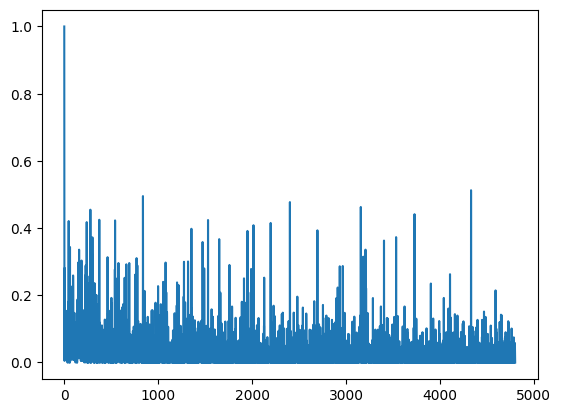

In [37]:
plt.plot(scores);

In [38]:
(-scores).argsort()

array([   0, 4332,  838, ..., 2765, 2733, 4802])

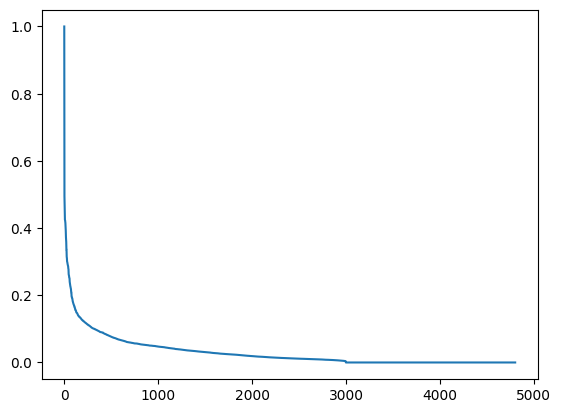

In [39]:
plt.plot(scores[(-scores).argsort()]);

In [40]:
# get top 5 matches
# exclude self (similarity between query and itself yields max score)
recommended_idx = (-scores).argsort()[1:10]
recommended_idx

array([4332,  838, 2403, 3158,  278, 3730,  373, 1531,  541])

In [41]:
# convert indices back to titles
df['title'].iloc[recommended_idx]

4332        Silent Running
838                 Alien³
2403                Aliens
3158                 Alien
278     Planet of the Apes
3730                 Cargo
373        Mission to Mars
1531             Moonraker
541                Soldier
Name: title, dtype: object